In [1]:

# Import general packages
import os
import copy
import matplotlib.pyplot as plt
import numpy as np

# Variables
%matplotlib inline


# Tensorflow versions
import tensorflow as tf

# Handle not pre-installed packages 
try: 
    import tensorflow_addons as tfa
except:
    os.system("pip install tensorflow-addons")
    import tensorflow_addons as tfa

try: 
    import optuna
except:
    os.system("pip install optuna")
    import optuna

# Print TensorFlow versions
print("TensorFlow version:", tf.__version__)
print("TensorFlow Addon version:", tfa.__version__)


c:\Users\asrkpx\Anaconda3\envs\Advance_dl_project\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
c:\Users\asrkpx\Anaconda3\envs\Advance_dl_project\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import t

TensorFlow version: 2.6.0
TensorFlow Addon version: 0.18.0


In [2]:

import self_classifier as sc

## MNIST

In [10]:
# Create config variable
config = {
    # Data Parameter
    'DATASET' : tf.keras.datasets.mnist,
    'IMAGE_SHAPE' : (28,28,1),
    'IMAGE_SIZE' : 32, 
    'BATCH_SIZE' : 64,
    'CLASS_COUNT' : 100,
    'N_AUG' : 5,
    # Training parameters
    'LR_SCHED' : "WarmUpCosineDecay",
    'OPTIM' : tf.keras.optimizers.Adam(),
    'EPOCHS' : 50,
    'MAX_LR' : 0.005,
}

In [5]:
train_loader = sc.DataLoader(in_path="datasets/mnist/train", mkdir=True)
train_ds = train_loader.get_train(config=config,extend_axis=True)

Generating new test augmentation dataset...
 => augment 1 complete
 => augment 2 complete
 => augment 3 complete
 => augment 4 complete
 => augment 5 complete
Saving new train dataset...[done]


In [6]:

test_loader = sc.DataLoader(in_path="datasets/mnist/test", mkdir=True)
test_ds = test_loader.get_test(config=config,extend_axis=True)


Generating new test augmentation dataset...
 => augment 1 complete
 => augment 2 complete
 => augment 3 complete
 => augment 4 complete
 => augment 5 complete
Saving new test dataset...[done]


In [7]:
train_ds

<BatchDataset shapes: ((None, 28, 28, 1), (None, 28, 28, 1), (None, 28, 28, 1), (None, 28, 28, 1), (None, 28, 28, 1), (None, 28, 28, 1)), types: (tf.float32, tf.float32, tf.float32, tf.float32, tf.float32, tf.float32)>

In [19]:
def training_run():
    # Create a data recorder and fit the data
    recorder = sc.DataRecorder()

    # Instansiate loss function
    loss_object_test = None #this is not need, to be removed
    # Instansiate SelfClassifier loss function
    loss_object_train = sc.SelfClassifier(n_batch=config['BATCH_SIZE'], 
                        n_class=config['CLASS_COUNT'], t_r=0.1, t_c=0.05)
    # Instansiate optimizer 
    optimizer = config['OPTIM']
    optimizer.lr = 0.0001
    #optimizer.learning_rate = sc.lr_schedular(config, config['LR_SCHED'],len(train_ds))
    
    # Select backbone 
    backbone = "EfficientNetB1"

    # Create an instance of the model
    
    model = sc.DynamicModel(input_shape=config['IMAGE_SHAPE'], output_shape=config['CLASS_COUNT'], n_nodes=10, n_layers=3, if_conv_layer=False)

    learner = sc.UnderSupervisedLearner(model=model, optimizer=optimizer,
                                 loss_object_train=loss_object_train,
                                 loss_object_test=loss_object_test,
                                 recorder=recorder)
    # Train the model
    return learner.fit(config=config, train_ds=train_ds,
                       test_ds=test_ds, plot_every=20)

============================== EPOCH 1 ==============================


Validation: 100%|██████████| 157/157 [00:03<00:00, 51.88it/s]


Epoch 1, Learning Rate: 0.00010, Epoch time: 28.93 seconds
Loss: 4.596, Valid Loss: 4.5749, NMI: 0.3749, AMI: 0.0568, ARI: 0.0457, ACC: 0.3118, 
============================== EPOCH 2 ==============================


Validation: 100%|██████████| 157/157 [00:02<00:00, 77.15it/s]


Epoch 2, Learning Rate: 0.00010, Epoch time: 25.41 seconds
Loss: 4.586, Valid Loss: 4.5597, NMI: 0.3013, AMI: 0.0701, ARI: 0.0382, ACC: 0.2944, 
============================== EPOCH 3 ==============================


Validation: 100%|██████████| 157/157 [00:02<00:00, 74.50it/s]


Epoch 3, Learning Rate: 0.00010, Epoch time: 23.73 seconds
Loss: 4.572, Valid Loss: 4.5581, NMI: 0.3060, AMI: 0.0653, ARI: 0.0337, ACC: 0.2944, 
============================== EPOCH 4 ==============================


Validation: 100%|██████████| 157/157 [00:02<00:00, 73.94it/s]


Epoch 4, Learning Rate: 0.00010, Epoch time: 24.85 seconds
Loss: 4.567, Valid Loss: 4.5582, NMI: 0.3215, AMI: 0.0723, ARI: 0.0382, ACC: 0.3002, 
============================== EPOCH 5 ==============================


Validation: 100%|██████████| 157/157 [00:02<00:00, 75.81it/s]


Epoch 5, Learning Rate: 0.00010, Epoch time: 24.32 seconds
Loss: 4.564, Valid Loss: 4.5532, NMI: 0.3268, AMI: 0.0701, ARI: 0.0379, ACC: 0.3064, 
============================== EPOCH 6 ==============================


Validation: 100%|██████████| 157/157 [00:02<00:00, 74.31it/s]


Epoch 6, Learning Rate: 0.00010, Epoch time: 24.04 seconds
Loss: 4.559, Valid Loss: 4.5475, NMI: 0.3419, AMI: 0.0822, ARI: 0.0438, ACC: 0.3117, 
============================== EPOCH 7 ==============================


Validation: 100%|██████████| 157/157 [00:02<00:00, 64.59it/s]


Epoch 7, Learning Rate: 0.00010, Epoch time: 24.84 seconds
Loss: 4.558, Valid Loss: 4.5392, NMI: 0.3590, AMI: 0.0777, ARI: 0.0454, ACC: 0.3175, 
============================== EPOCH 8 ==============================


Validation: 100%|██████████| 157/157 [00:02<00:00, 66.30it/s]


Epoch 8, Learning Rate: 0.00010, Epoch time: 25.20 seconds
Loss: 4.552, Valid Loss: 4.5369, NMI: 0.3714, AMI: 0.0879, ARI: 0.0466, ACC: 0.3207, 
============================== EPOCH 9 ==============================


Validation: 100%|██████████| 157/157 [00:02<00:00, 66.00it/s]


Epoch 9, Learning Rate: 0.00010, Epoch time: 25.65 seconds
Loss: 4.550, Valid Loss: 4.5347, NMI: 0.3833, AMI: 0.0869, ARI: 0.0467, ACC: 0.3210, 
============================== EPOCH 10 ==============================


Validation: 100%|██████████| 157/157 [00:02<00:00, 75.77it/s]


Epoch 10, Learning Rate: 0.00010, Epoch time: 23.85 seconds
Loss: 4.546, Valid Loss: 4.5395, NMI: 0.4001, AMI: 0.0857, ARI: 0.0468, ACC: 0.3211, 
============================== EPOCH 11 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 101.39it/s]


Epoch 11, Learning Rate: 0.00010, Epoch time: 19.66 seconds
Loss: 4.546, Valid Loss: 4.5345, NMI: 0.4173, AMI: 0.0886, ARI: 0.0508, ACC: 0.3242, 
============================== EPOCH 12 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 104.78it/s]


Epoch 12, Learning Rate: 0.00010, Epoch time: 16.71 seconds
Loss: 4.538, Valid Loss: 4.5182, NMI: 0.4223, AMI: 0.0923, ARI: 0.0544, ACC: 0.3245, 
============================== EPOCH 13 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 108.94it/s]


Epoch 13, Learning Rate: 0.00010, Epoch time: 15.93 seconds
Loss: 4.536, Valid Loss: 4.5150, NMI: 0.4153, AMI: 0.0943, ARI: 0.0540, ACC: 0.3287, 
============================== EPOCH 14 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 109.60it/s]


Epoch 14, Learning Rate: 0.00010, Epoch time: 15.73 seconds
Loss: 4.526, Valid Loss: 4.5137, NMI: 0.4166, AMI: 0.0902, ARI: 0.0520, ACC: 0.3253, 
============================== EPOCH 15 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 109.96it/s]


Epoch 15, Learning Rate: 0.00010, Epoch time: 15.85 seconds
Loss: 4.518, Valid Loss: 4.5084, NMI: 0.4238, AMI: 0.0912, ARI: 0.0533, ACC: 0.3245, 
============================== EPOCH 16 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 108.09it/s]


Epoch 16, Learning Rate: 0.00010, Epoch time: 15.72 seconds
Loss: 4.521, Valid Loss: 4.5142, NMI: 0.4429, AMI: 0.0862, ARI: 0.0520, ACC: 0.3188, 
============================== EPOCH 17 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 110.18it/s]


Epoch 17, Learning Rate: 0.00010, Epoch time: 15.55 seconds
Loss: 4.514, Valid Loss: 4.4983, NMI: 0.4470, AMI: 0.0918, ARI: 0.0554, ACC: 0.3201, 
============================== EPOCH 18 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 111.83it/s]


Epoch 18, Learning Rate: 0.00010, Epoch time: 15.79 seconds
Loss: 4.513, Valid Loss: 4.5087, NMI: 0.4528, AMI: 0.1019, ARI: 0.0612, ACC: 0.3248, 
============================== EPOCH 19 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 109.98it/s]


Epoch 19, Learning Rate: 0.00010, Epoch time: 15.94 seconds
Loss: 4.507, Valid Loss: 4.5003, NMI: 0.4446, AMI: 0.0896, ARI: 0.0533, ACC: 0.3221, 
============================== EPOCH 20 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 110.98it/s]


Epoch 20, Learning Rate: 0.00010, Epoch time: 15.73 seconds
Loss: 4.501, Valid Loss: 4.5080, NMI: 0.4505, AMI: 0.0973, ARI: 0.0581, ACC: 0.3231, 


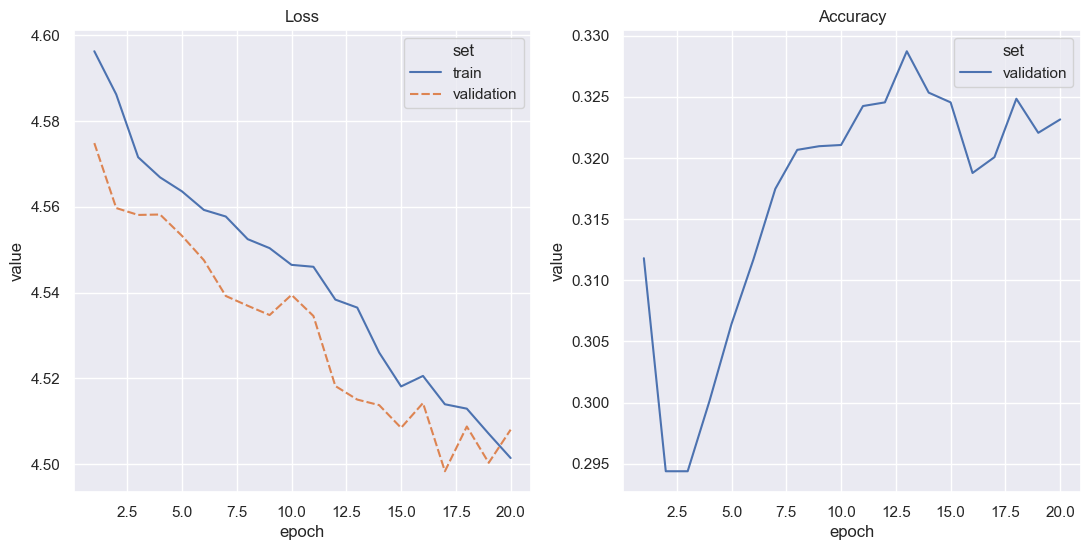

============================== EPOCH 21 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 109.99it/s]


Epoch 21, Learning Rate: 0.00010, Epoch time: 16.21 seconds
Loss: 4.500, Valid Loss: 4.5129, NMI: 0.4436, AMI: 0.0901, ARI: 0.0527, ACC: 0.3183, 
============================== EPOCH 22 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 109.36it/s]


Epoch 22, Learning Rate: 0.00010, Epoch time: 15.71 seconds
Loss: 4.501, Valid Loss: 4.5034, NMI: 0.4472, AMI: 0.0951, ARI: 0.0569, ACC: 0.3249, 
============================== EPOCH 23 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 109.22it/s]


Epoch 23, Learning Rate: 0.00010, Epoch time: 15.91 seconds
Loss: 4.497, Valid Loss: 4.4937, NMI: 0.4472, AMI: 0.0944, ARI: 0.0572, ACC: 0.3244, 
============================== EPOCH 24 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 88.74it/s] 


Epoch 24, Learning Rate: 0.00010, Epoch time: 16.36 seconds
Loss: 4.501, Valid Loss: 4.4988, NMI: 0.4485, AMI: 0.0962, ARI: 0.0575, ACC: 0.3259, 
============================== EPOCH 25 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 92.58it/s] 


Epoch 25, Learning Rate: 0.00010, Epoch time: 17.56 seconds
Loss: 4.493, Valid Loss: 4.4898, NMI: 0.4463, AMI: 0.0969, ARI: 0.0569, ACC: 0.3256, 
============================== EPOCH 26 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 98.18it/s] 


Epoch 26, Learning Rate: 0.00010, Epoch time: 16.55 seconds
Loss: 4.490, Valid Loss: 4.4809, NMI: 0.4533, AMI: 0.1050, ARI: 0.0631, ACC: 0.3289, 
============================== EPOCH 27 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 94.65it/s] 


Epoch 27, Learning Rate: 0.00010, Epoch time: 16.86 seconds
Loss: 4.486, Valid Loss: 4.4959, NMI: 0.4582, AMI: 0.0915, ARI: 0.0537, ACC: 0.3144, 
============================== EPOCH 28 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 93.63it/s] 


Epoch 28, Learning Rate: 0.00010, Epoch time: 17.25 seconds
Loss: 4.491, Valid Loss: 4.4866, NMI: 0.4718, AMI: 0.0950, ARI: 0.0568, ACC: 0.3157, 
============================== EPOCH 29 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 92.92it/s] 


Epoch 29, Learning Rate: 0.00010, Epoch time: 18.35 seconds
Loss: 4.476, Valid Loss: 4.4830, NMI: 0.4731, AMI: 0.0918, ARI: 0.0548, ACC: 0.3131, 
============================== EPOCH 30 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 102.82it/s]


Epoch 30, Learning Rate: 0.00010, Epoch time: 16.55 seconds
Loss: 4.482, Valid Loss: 4.4814, NMI: 0.4779, AMI: 0.0946, ARI: 0.0582, ACC: 0.3142, 
============================== EPOCH 31 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 102.02it/s]


Epoch 31, Learning Rate: 0.00010, Epoch time: 16.75 seconds
Loss: 4.486, Valid Loss: 4.4893, NMI: 0.4744, AMI: 0.0955, ARI: 0.0579, ACC: 0.3145, 
============================== EPOCH 32 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 93.38it/s] 


Epoch 32, Learning Rate: 0.00010, Epoch time: 16.84 seconds
Loss: 4.472, Valid Loss: 4.4721, NMI: 0.4764, AMI: 0.0927, ARI: 0.0567, ACC: 0.3117, 
============================== EPOCH 33 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 92.75it/s]


Epoch 33, Learning Rate: 0.00010, Epoch time: 17.14 seconds
Loss: 4.477, Valid Loss: 4.4859, NMI: 0.4867, AMI: 0.1002, ARI: 0.0607, ACC: 0.3122, 
============================== EPOCH 34 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 103.49it/s]


Epoch 34, Learning Rate: 0.00010, Epoch time: 16.75 seconds
Loss: 4.478, Valid Loss: 4.4861, NMI: 0.4861, AMI: 0.0999, ARI: 0.0613, ACC: 0.3129, 
============================== EPOCH 35 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 102.53it/s]


Epoch 35, Learning Rate: 0.00010, Epoch time: 16.74 seconds
Loss: 4.472, Valid Loss: 4.4811, NMI: 0.4905, AMI: 0.0989, ARI: 0.0608, ACC: 0.3119, 
============================== EPOCH 36 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 94.10it/s]


Epoch 36, Learning Rate: 0.00010, Epoch time: 17.77 seconds
Loss: 4.470, Valid Loss: 4.4848, NMI: 0.4962, AMI: 0.1012, ARI: 0.0613, ACC: 0.3113, 
============================== EPOCH 37 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 102.03it/s]


Epoch 37, Learning Rate: 0.00010, Epoch time: 16.78 seconds
Loss: 4.468, Valid Loss: 4.4849, NMI: 0.4922, AMI: 0.0957, ARI: 0.0577, ACC: 0.3085, 
============================== EPOCH 38 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 102.01it/s]


Epoch 38, Learning Rate: 0.00010, Epoch time: 16.72 seconds
Loss: 4.461, Valid Loss: 4.4635, NMI: 0.4990, AMI: 0.1055, ARI: 0.0651, ACC: 0.3135, 
============================== EPOCH 39 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 103.43it/s]


Epoch 39, Learning Rate: 0.00010, Epoch time: 16.64 seconds
Loss: 4.469, Valid Loss: 4.4685, NMI: 0.4983, AMI: 0.1039, ARI: 0.0633, ACC: 0.3136, 
============================== EPOCH 40 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 100.10it/s]


Epoch 40, Learning Rate: 0.00010, Epoch time: 16.81 seconds
Loss: 4.460, Valid Loss: 4.4687, NMI: 0.4968, AMI: 0.1015, ARI: 0.0618, ACC: 0.3103, 


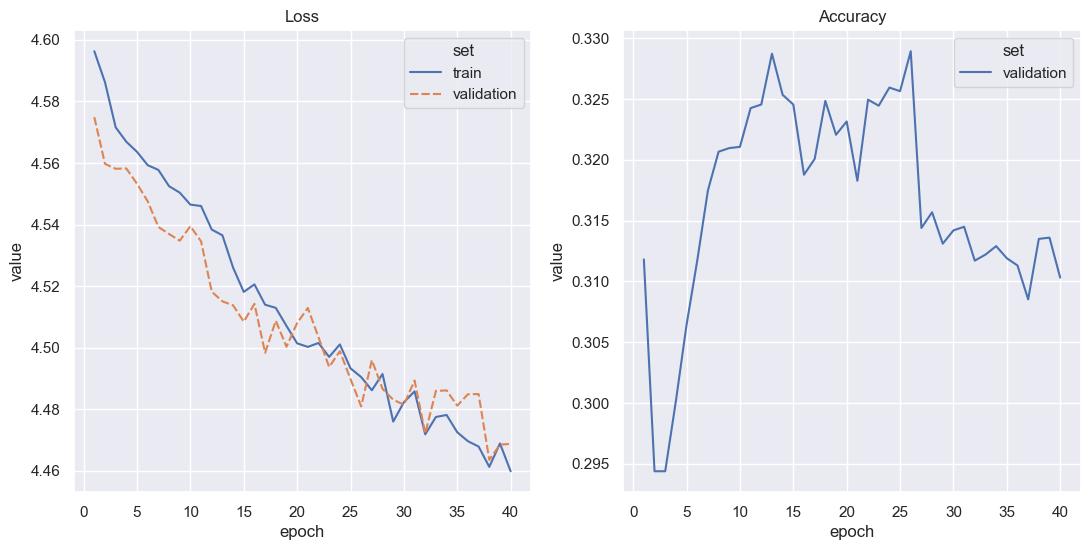

============================== EPOCH 41 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 99.65it/s] 


Epoch 41, Learning Rate: 0.00010, Epoch time: 16.88 seconds
Loss: 4.468, Valid Loss: 4.4622, NMI: 0.4989, AMI: 0.1047, ARI: 0.0666, ACC: 0.3126, 
============================== EPOCH 42 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 95.59it/s] 


Epoch 42, Learning Rate: 0.00010, Epoch time: 16.77 seconds
Loss: 4.460, Valid Loss: 4.4634, NMI: 0.4954, AMI: 0.0961, ARI: 0.0578, ACC: 0.3076, 
============================== EPOCH 43 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 94.89it/s] 


Epoch 43, Learning Rate: 0.00010, Epoch time: 17.06 seconds
Loss: 4.463, Valid Loss: 4.4825, NMI: 0.5011, AMI: 0.1075, ARI: 0.0657, ACC: 0.3145, 
============================== EPOCH 44 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 102.32it/s]


Epoch 44, Learning Rate: 0.00010, Epoch time: 16.83 seconds
Loss: 4.461, Valid Loss: 4.4581, NMI: 0.5015, AMI: 0.1058, ARI: 0.0640, ACC: 0.3155, 
============================== EPOCH 45 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 103.31it/s]


Epoch 45, Learning Rate: 0.00010, Epoch time: 16.72 seconds
Loss: 4.457, Valid Loss: 4.4494, NMI: 0.5006, AMI: 0.1062, ARI: 0.0639, ACC: 0.3111, 
============================== EPOCH 46 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 90.66it/s] 


Epoch 46, Learning Rate: 0.00010, Epoch time: 17.38 seconds
Loss: 4.452, Valid Loss: 4.4705, NMI: 0.5010, AMI: 0.1054, ARI: 0.0638, ACC: 0.3126, 
============================== EPOCH 47 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 101.26it/s]


Epoch 47, Learning Rate: 0.00010, Epoch time: 16.67 seconds
Loss: 4.460, Valid Loss: 4.4602, NMI: 0.5043, AMI: 0.1048, ARI: 0.0659, ACC: 0.3123, 
============================== EPOCH 48 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 90.74it/s]


Epoch 48, Learning Rate: 0.00010, Epoch time: 16.45 seconds
Loss: 4.458, Valid Loss: 4.4549, NMI: 0.5085, AMI: 0.1103, ARI: 0.0679, ACC: 0.3134, 
============================== EPOCH 49 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 107.74it/s]


Epoch 49, Learning Rate: 0.00010, Epoch time: 15.89 seconds
Loss: 4.451, Valid Loss: 4.4598, NMI: 0.5079, AMI: 0.1106, ARI: 0.0665, ACC: 0.3128, 
============================== EPOCH 50 ==============================


Validation: 100%|██████████| 157/157 [00:01<00:00, 107.02it/s]

Epoch 50, Learning Rate: 0.00010, Epoch time: 15.58 seconds
Loss: 4.451, Valid Loss: 4.4513, NMI: 0.5072, AMI: 0.1095, ARI: 0.0664, ACC: 0.3115, 

<<<<<<<<<<<<<<<<<<<<<<<<<< FINISHED 916.80s >>>>>>>>>>>>>>>>>>>>>>>>>>


(4.451293, 0.3115047770700637)

In [20]:
training_run()

## Blobs

In [ ]:
# Create config variable
config = {
    # Data Parameter
    'DATASET' : tf.keras.datasets.cifar100,
    'IMAGE_SHAPE' : (32,32,3),
    'IMAGE_SIZE' : 32, 
    'BATCH_SIZE' : 64,
    'CLASS_COUNT' : 100,
    'N_AUG' : 2,
    # Training parameters
    'LR_SCHED' : "WarmUpCosineDecay",
    'OPTIM' : tf.keras.optimizers.Adam(),
    'EPOCHS' : 100,
    'MAX_LR' : 0.005,
}